# Essential Math for Data Science

## 6. Logistic Regression and Classification

### Logistic Function

In [1]:
import math

def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


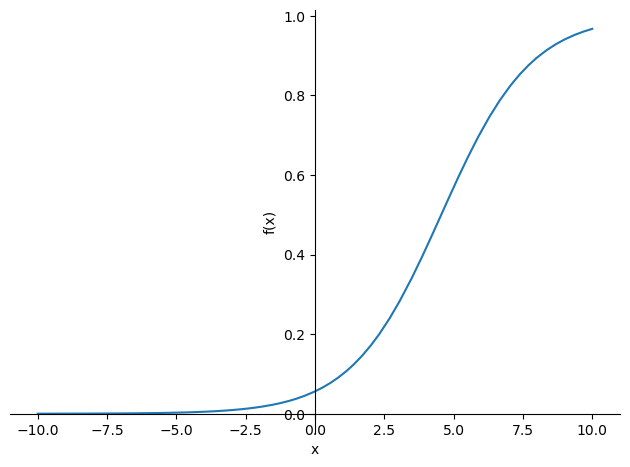

In [9]:
from sympy import *

b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)

print(p)

plot(p);

### Fitting the Logistic Curve Using scikit-learn

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://bit.ly/33ebs2R', delimiter = ',')

X = df.values[:, :-1]
Y = df.values[:, -1]

# Perform logistic regression
# Turn off penalty
model = LogisticRegression(penalty = 'none')
model.fit(X, Y)

# print beta1
print(model.coef_.flatten())

# print beta0
print(model.intercept_.flatten())

[0.69267212]
[-3.17576395]


### Fitting the Logistic Curve Using Maximum Likelihood and Gradient Descent

In [16]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter = ',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

# Calculate the join likelihood
joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1.0 - logistic_function(p.x))
        
print(joint_likelihood)

4.7911180221699105e-05


In [17]:
for p in patient_data:
    joint_likelihood *= logistic_function(p.x) ** p.y * \
                        (1.0 - logistic_function(p.x)) ** (1.0 - p.y)

In [20]:
# Calculate the joint likelihood
joint_likelihood = 0.0

for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x) ** p.y * \
                        (1.0 - logistic_function(p.x)) ** (1.0 - p.y))
    
joint_likelihood = math.exp(joint_likelihood)

In [26]:
#joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b + m * x(i)))))**y(i) * \
#                       (1.0 - (1.0 / (1.0 + exp(-(b + m * x(i))))))**(1 - y(i))), (i, 0, n))

In [33]:
from sympy import *
import pandas as pd

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) \
     * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

# Partial derivative for m, with points substituted
d_b1 = diff(joint_likelihood, b1) \
       .subs(n, len(points) - 1) \
       .doit().replace(x, lambda i: points[i].x) \
       .replace(y, lambda i: points[i].y)

# Partial derivative for m, with points substituted
d_b0 = diff(joint_likelihood, b0) \
       .subs(n, len(points) - 1) \
       .doit().replace(x, lambda i: points[i].x) \
       .replace(y, lambda i: points[i].y)

# compile using lambdify for faster computation
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# Perform Gradient Descent
b1 = 0.01
b0 = 0.01
L = .01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370812 -3.175751550409821


### Multivariable Logistic Regression

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv('https://tinyurl.com/y6r7qjrp')

# Select independent variable columns
inputs = employee_data.iloc[:, :-1]

# Select dependent variable column
output = employee_data.iloc[:, -1]

# Build logistic regression
fit = LogisticRegression(penalty = 'none').fit(inputs, output)

# Print coefficients
print(f'Coefficient: {fit.coef_.flatten()}')
print(f'Intercept: {fit.intercept_.flatten()}')

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return print(f'Will leave: {probabilities}')
    else:
        return print(f'Will stay: {probabilities}')

Coefficient: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
Intercept: [-2.73485302]


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]

# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1]

# build logistic regression
fit = LogisticRegression(penalty='none').fit(inputs, output)

# Print coefficients:
print("COEFFICIENTS: {0}".format(fit.coef_.flatten()))
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "WILL LEAVE: {0}".format(probabilities)
    else:
        return "WILL STAY: {0}".format(probabilities)

# Test a prediction
while True:
    n = input("Predict employee will stay or leave {sex}, {age}, {promotions}, {years employed}: ")
    (sex, age, promotions, years_employed) = n.split(",")
    print(predict_employee_will_stay(int(sex), ibnt(age), int(promotions), int(years_employed)))

COEFFICIENTS: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
INTERCEPT: [-2.73485302]


Predict employee will stay or leave {sex}, {age}, {promotions}, {years employed}:  0, 30, 0, 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


WILL LEAVE: [[0.4210813 0.5789187]]


KeyboardInterrupt: Interrupted by user

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]

# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1]

# build logistic regression
fit = LogisticRegression(penalty='none').fit(inputs, output)

# Print coefficients:
print("COEFFICIENTS: {0}".format(fit.coef_.flatten()))
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))

# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "WILL LEAVE: {0}".format(probabilities)
    else:
        return "WILL STAY: {0}".format(probabilities)

COEFFICIENTS: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
INTERCEPT: [-2.73485302]


In [17]:
predict_employee_will_stay(
    sex = 0, 
    age = 30, 
    promotions = 1, 
    years_employed = 4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'WILL STAY: [[0.55905087 0.44094913]]'

### R-Squared

In [20]:
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter = ',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Sum the log-likelihoods
log_likelihood_fit = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood_fit += log(logistic_function(p.x))
    elif p.y == 0.0:
        log_likelihood_fit += log(1.0 - logistic_function(p.x))
        
print(log_likelihood_fit)

-9.946161673231583


In [22]:
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y + 
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

In [25]:
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter = ',').itertuples())

likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood += log(likelihood)
    elif p.y == 0.0:
        log_likelihood += log(1.0 - likelihood)
        
print(log_likelihood)

-14.341070198709906


In [27]:
log_likelihood = sum(log(likelihood)*p.y + log(1.0 - likelihood)*(1.0 - p.y) \
                     for p in patient_data)

In [26]:
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter = ',').itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p

# Calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
                         for p in patient_data)

# Calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                     for p in patient_data)

# Calculate R-Square
r2 = (log_likelihood - log_likelihood_fit) / log_likelihood

print(r2)

0.306456105756576
